In [1]:
from fragsys_custom import *

In [ ]:
def def_bs_oc(results_dir, pdb_files, input_id, bs_def_out, attr_out, chimera_script_out, arpeggio_dir, metric = oc_metric, dist = oc_dist, method = oc_method):
    """
    given a set of pdb structures, and other arguments, clusters ligands in space,
    defines binding sites and writes chimera attribute files and chimera script to
    format the superimposed structures to facilitate visualisation
    
    alt_fmt is a boolean I added so it works with slightly different input. Still PDB
    files, but some which coordinates were transformed using PDBe-KB transformation
    matrices. They have different nomenclature and therefore indices to get pdb_files_dict
    must be different
    """
    lig_data_df, labs = generate_ligs_res_df(arpeggio_dir)

    print(lig_data_df, labs)

    if len(lig_data_df) == 1: #should only happen in the case of only one LOI
        lig_data_df["binding_site"] = 0
    else:
        dis_out = os.path.join(results_dir, "{}_{}.dis".format(input_id, metric))
        get_dis_file(lig_data_df, labs, dis_out, metric = metric)
        
        ocout, ec = oc(dis_out, method = method, cut_t = dist)
        oc_dict = oc2dict(ocout)
        cluster_id_dict = {}
        for k, v in oc_dict.items():
            for member in v["members"]:
                cluster_id_dict[member] = v["new_id"]
                
        lig_data_df["lab"] = labs 
        lig_data_df["binding_site"] = lig_data_df.lab.map(cluster_id_dict)
        print(pdb_files)
        pdb_files_dict = {f.split("/")[-1].split(".")[0]: f.split("/")[-1] for f in pdb_files}
        lig_data_df["pdb_path"] = lig_data_df.pdb_id.map(pdb_files_dict)

    print(lig_data_df)
    #sys.exit()
    
    write_bs_files(lig_data_df, bs_def_out, attr_out, chimera_script_out)
    
    return lig_data_df

In [70]:
input_id = "faba_pandda_hits"
results_dir = "/homes/2394007/fragsys_custom/output/{}/results".format(input_id)
arpeggio_dir = "/homes/2394007/fragsys_custom/output/{}/arpeggio".format(input_id)
clean_pdbs_dir = "/homes/2394007/fragsys_custom/output/{}/clean_pdbs".format(input_id)

In [74]:
lig_data_df

,pdb_id,lig_name,lig_resnum,lig_chain,binding_res,lab,binding_site,pdb_path
0,4B0B_ALL,54F,1172,A,"[70, 71, 76, 77, 78, 79, 84, 87, 88, 103, 104,...",4B0B_ALL_54F_1172_A,0,4B0B_ALL.clean.pdb
1,4B0B_ALL,54F,1172,B,"[70, 71, 76, 77, 79, 84, 87, 88, 103, 104, 105...",4B0B_ALL_54F_1172_B,0,4B0B_ALL.clean.pdb
2,4B0C_AB,C9H,501,A,"[70, 71, 76, 77, 78, 79, 84, 87, 88, 91, 103, ...",4B0C_AB_C9H_501_A,0,4B0C_AB.clean.pdb
3,4B0C_AB,C9H,501,B,"[27, 70, 76, 77, 78, 79, 87, 88, 103, 104, 105...",4B0C_AB_C9H_501_B,0,4B0C_AB.clean.pdb
4,4B0C_CD,C9H,501,C,"[70, 71, 76, 77, 78, 79, 84, 87, 91, 92, 103, ...",4B0C_CD_C9H_501_C,0,4B0C_CD.clean.pdb
5,4B0C_CD,C9H,501,D,"[70, 71, 77, 78, 79, 84, 87, 88, 91, 103, 104,...",4B0C_CD_C9H_501_D,0,4B0C_CD.clean.pdb
6,4B0C_E,C9H,501,E,"[70, 76, 77, 78, 79, 113, 115, 116, 155, 71]",4B0C_E_C9H_501_E,0,4B0C_E.clean.pdb
7,4B0I_AB,KBP,1170,A,"[26, 27, 28, 29, 70, 71, 76, 78, 79, 84, 87, 8...",4B0I_AB_KBP_1170_A,0,4B0I_AB.clean.pdb
8,4B0I_AB,KBP,1172,B,"[26, 27, 28, 29, 70, 71, 76, 77, 78, 79, 84, 8...",4B0I_AB_KBP_1172_B,0,4B0I_AB.clean.pdb
9,4B0I_CD,KBP,1172,C,"[15, 26, 27, 28, 29, 70, 71, 76, 77, 79, 84, 8...",4B0I_CD_KBP_1172_C,0,4B0I_CD.clean.pdb


In [3]:
lig_data_df, labs = generate_ligs_res_df(arpeggio_dir)

In [6]:
lig_res = lig_data_df.binding_res.tolist()

In [20]:
intersect_dict = get_intersect_rel_matrix(lig_res)

In [22]:
irel_mat = pd.DataFrame(intersect_dict).round(3)

In [58]:
d = 0.5

dist_df = 1 - irel_mat # distance matrix in pd.Dataframe() format
condensed_dist_mat = scipy.spatial.distance.squareform(dist_df) # condensed distance matrix to be used for clustering
linkage = scipy.cluster.hierarchy.linkage(condensed_dist_mat, method = "average", optimal_ordering = True)
cut_tree = scipy.cluster.hierarchy.cut_tree(linkage, height = d)
cluster_ids = [int(cut) for cut in cut_tree]

In [59]:
cluster_id_dict = {labs[i]: cluster_ids[i] for i in range(len(labs))} #dictionary indicating membership for each lig

In [73]:
cluster_id_dict

{'4B0B_ALL_54F_1172_A': 0,
 '4B0B_ALL_54F_1172_B': 0,
 '4B0C_AB_C9H_501_A': 0,
 '4B0C_AB_C9H_501_B': 0,
 '4B0C_CD_C9H_501_C': 0,
 '4B0C_CD_C9H_501_D': 0,
 '4B0C_E_C9H_501_E': 0,
 '4B0I_AB_KBP_1170_A': 0,
 '4B0I_AB_KBP_1172_B': 0,
 '4B0I_CD_KBP_1172_C': 0,
 '4B0I_CD_KBP_1172_D': 0,
 '4B0I_E_KBP_1172_E': 0,
 '4B0J_AB_3MQ_1172_A': 0,
 '4B0J_AB_3MQ_1172_B': 0,
 '4B0J_CD_3MQ_1172_C': 0,
 '4B0J_CD_3MQ_1172_D': 0,
 '4B0J_EF_3MQ_1172_E': 0,
 '4B0J_EF_3MQ_1172_F': 0,
 '4B0J_GH_3MQ_1172_G': 0,
 '4B0J_GH_3MQ_1172_H': 0,
 '4B0J_IJ_3MQ_1172_I': 0,
 '4B0J_IJ_3MQ_1172_J': 0,
 '4B0J_KL_3MQ_1172_K': 0,
 '4B0J_KL_3MQ_1172_L': 0,
 '4B0J_MN_3MQ_1172_M': 0,
 '4B0J_MN_3MQ_1172_N': 0,
 '4B0J_OP_3MQ_1172_O': 0,
 '4B0J_OP_3MQ_1172_P': 0,
 '4B0J_QR_3MQ_1172_Q': 0,
 '4B0J_QR_3MQ_1172_R': 0,
 '4B0J_ST_3MQ_1172_S': 0,
 '4B0J_ST_3MQ_1172_T': 0,
 '4B8U_AB_IBK_501_B': 0,
 '4B8U_CD_SO4_1167_C': 1,
 '4cl6_AB_7SB_501_A': 0,
 '4cl6_AB_7SB_501_B': 0,
 '4cl6_CD_7SB_501_C': 0,
 '4cl6_CD_7SB_501_D': 0,
 '4cl6_E_7SB_501_E': 0

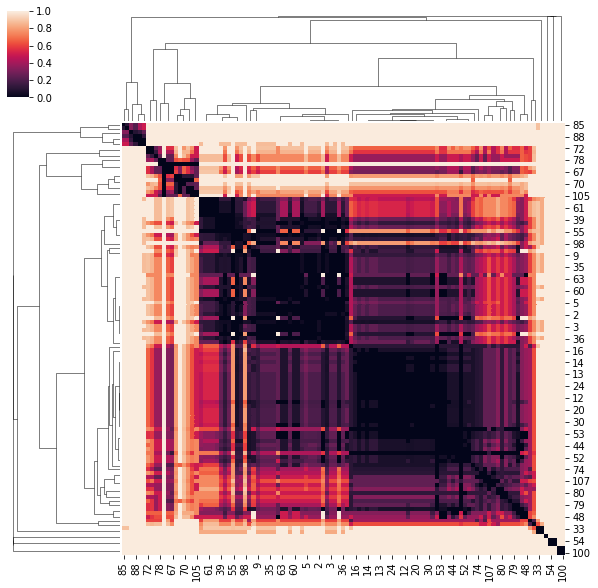

In [60]:
sns.clustermap(dist_df, row_linkage = linkage, col_linkage = linkage)
plt.show()

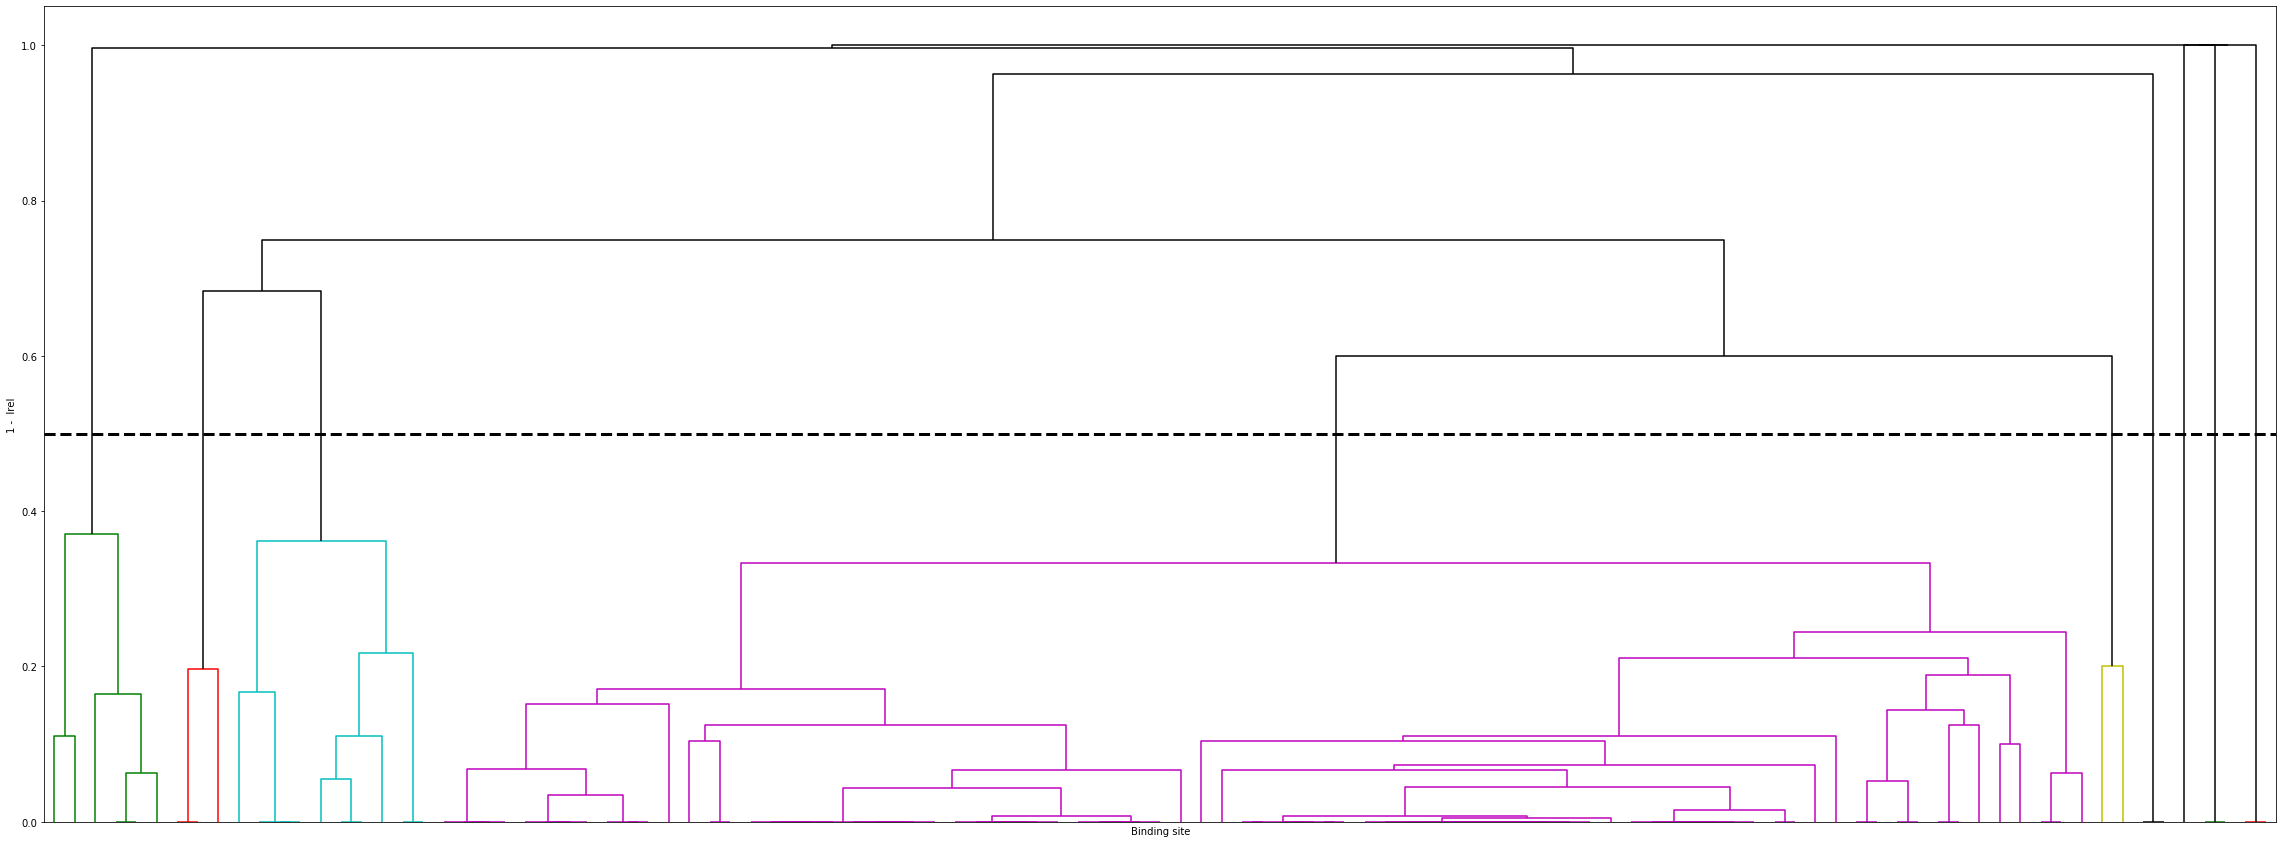

In [61]:
fig = plt.figure(figsize=(40, 15))
plt.axhline(d, linestyle = "--", linewidth = 3, color = "black")   
dd = scipy.cluster.hierarchy.dendrogram(linkage, no_labels = True, labels = labs, leaf_font_size = 10, color_threshold = d, above_threshold_color = "black")
plt.xlabel("Binding site")
plt.ylabel("1 -  Irel")
plt.show()

In [66]:
pdb_paths = [os.path.join(clean_pdbs_dir, file) for file in os.listdir(clean_pdbs_dir)]
lig_data_df["lab"] = labs 
lig_data_df["binding_site"] = lig_data_df.lab.map(cluster_id_dict)
pdb_files_dict = {f.split("/")[-1].split(".")[0]: f.split("/")[-1] for f in pdb_paths}
lig_data_df["pdb_path"] = lig_data_df.pdb_id.map(pdb_files_dict)

In [71]:
string_name = "{}_BS_def_OC_{}_{}_{}".format(input_id, "avg", "D_rel", 0.5)
bs_def_out = os.path.join(results_dir, "{}.pkl".format(string_name))
attr_out = os.path.join(results_dir, "{}.attr".format(string_name))
chimera_script_out = os.path.join(results_dir, "{}.com".format(string_name))

In [72]:
write_bs_files(lig_data_df, bs_def_out, attr_out, chimera_script_out)

2023-09-08 09:31:40,397 FRAGSYS_CUSTOM INFO     Chimera script successfully created
